## Formula 1 Project

Data was imported from Wiki

Importing Libarires

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('Formula 1 Race Qualifying Dataset.csv')
print(df.shape)

(10254, 15)


### Learning more about the data and its feature

In [ ]:
df.head(10)

,constructorId,name,nationality_x,qualifyId,driverId,position,q1,q2,q3,driverRef,code,forename,surname,dob,nationality_y
0,1,McLaren,British,1,1,1,1:26.572,1:25.187,1:26.714,hamilton,HAM,Lewis,Hamilton,1985-01-07,British
1,1,McLaren,British,3,5,3,1:25.664,1:25.452,1:27.079,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish
2,1,McLaren,British,25,5,3,1:35.227,1:34.759,1:36.613,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish
3,1,McLaren,British,26,1,4,1:35.392,1:34.627,1:36.709,hamilton,HAM,Lewis,Hamilton,1985-01-07,British
4,1,McLaren,British,47,1,3,1:32.750,1:31.922,1:33.292,hamilton,HAM,Lewis,Hamilton,1985-01-07,British
5,1,McLaren,British,49,5,5,1:33.057,1:31.718,1:33.488,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish
6,1,McLaren,British,71,1,5,1:21.366,1:20.825,1:22.096,hamilton,HAM,Lewis,Hamilton,1985-01-07,British
7,1,McLaren,British,72,5,6,1:21.430,1:20.817,1:22.231,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish
8,1,McLaren,British,90,5,2,1:26.736,1:26.290,1:27.808,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish
9,1,McLaren,British,91,1,3,1:26.192,1:26.477,1:27.923,hamilton,HAM,Lewis,Hamilton,1985-01-07,British


## Cheking for null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10254 entries, 0 to 10253
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   constructorId  10254 non-null  int64 
 1   name           10254 non-null  object
 2   nationality_x  10254 non-null  object
 3   qualifyId      10254 non-null  int64 
 4   driverId       10254 non-null  int64 
 5   position       10254 non-null  int64 
 6   q1             10254 non-null  object
 7   q2             10241 non-null  object
 8   q3             10227 non-null  object
 9   driverRef      10254 non-null  object
 10  code           10254 non-null  object
 11  forename       10254 non-null  object
 12  surname        10254 non-null  object
 13  dob            10254 non-null  object
 14  nationality_y  10254 non-null  object
dtypes: int64(4), object(11)
memory usage: 1.2+ MB


-------------------------------------------------------------------------------------------------------
--------------------------------------------
From this we can find that there is null values in q2 and q3

but knowing about the data we know that it mentions those that weren't qualified form q1

______________________
___________

In [ ]:
# display the total number of null values in the dataset
total_nulls = df.isnull().sum().sum()
print("\nTotal number of null values in the dataset:", total_nulls)

# Display rows and columns where null values are found
print("\nLocations of null values in the dataset (row index, column name):")
null_locations = [(index, column) for index, row in df.iterrows() for column, value in row.items() if pd.isnull(value)]
for location in null_locations:
    print(location)


Total number of null values in the dataset: 40

Locations of null values in the dataset (row index, column name):
(2038, 'q3')
(2042, 'q3')
(2043, 'q2')
(2043, 'q3')
(2051, 'q3')
(4057, 'q2')
(4057, 'q3')
(4061, 'q3')
(5161, 'q3')
(6361, 'q2')
(6361, 'q3')
(6371, 'q2')
(6371, 'q3')
(6372, 'q2')
(6372, 'q3')
(8017, 'q2')
(8017, 'q3')
(8018, 'q2')
(8018, 'q3')
(8150, 'q3')
(8163, 'q3')
(8164, 'q2')
(8164, 'q3')
(8735, 'q3')
(9807, 'q2')
(9807, 'q3')
(9810, 'q3')
(9811, 'q2')
(9811, 'q3')
(9821, 'q2')
(9821, 'q3')
(10073, 'q3')
(10205, 'q3')
(10208, 'q2')
(10208, 'q3')
(10209, 'q2')
(10209, 'q3')
(10218, 'q3')
(10219, 'q3')
(10233, 'q3')


To be done remove the null

Filling the Null numbers with the mean max + threashold But later we will swap all the '0:00.0'

In [ ]:
# Replace the null values in q2 and q3 Format 1:26.572  ### not right
df['q2'] = df['q2'].fillna('0:00.0')
df['q3'] = df['q3'].fillna('0:00.0')

print("Filled missing values with '0:00.0' in Q2 and Q3 columns.")
# to do fill with mean or max

Filled missing values with '0:00.0' in Q2 and Q3 columns.


We filled the null values with 0.. but there is an issue that it will affect the time .. To be decided

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10254 entries, 0 to 10253
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   constructorId  10254 non-null  int64 
 1   name           10254 non-null  object
 2   nationality_x  10254 non-null  object
 3   qualifyId      10254 non-null  int64 
 4   driverId       10254 non-null  int64 
 5   position       10254 non-null  int64 
 6   q1             10254 non-null  object
 7   q2             10254 non-null  object
 8   q3             10254 non-null  object
 9   driverRef      10254 non-null  object
 10  code           10254 non-null  object
 11  forename       10254 non-null  object
 12  surname        10254 non-null  object
 13  dob            10254 non-null  object
 14  nationality_y  10254 non-null  object
dtypes: int64(4), object(11)
memory usage: 1.2+ MB


Recheking for null values

In [ ]:
has_n_values = df[['q1', 'q2', 'q3']].isin(['\\N']).any().any()

if has_n_values:
    print("There are '\\N' values in the q1, q2, or q3 columns.")
else:
    print("There are no '\\N' values in the q1, q2, or q3 columns.")

There are '\N' values in the q1, q2, or q3 columns.


In [ ]:
# Find rows with '\\N' values in any of the columns
rows_with_n = df[df[['q1', 'q2', 'q3']].isin(['\\N']).any(axis=1)]

# Print the rows with '\\N' values
rows_with_n

,constructorId,name,nationality_x,qualifyId,driverId,position,q1,q2,q3,driverRef,code,forename,surname,dob,nationality_y
27,1,McLaren,British,283,1,15,1:35.394,1:39.265,\N,hamilton,HAM,Lewis,Hamilton,1985-01-07,British
51,1,McLaren,British,532,4,10,1:15.322,1:15.084,\N,alonso,ALO,Fernando,Alonso,1981-07-29,Spanish
71,1,McLaren,British,764,8,22,\N,\N,\N,raikkonen,RAI,Kimi,Räikkönen,1979-10-17,Finnish
81,1,McLaren,British,864,31,12,1:16.195,1:15.801,\N,montoya,MON,Juan,Pablo Montoya,1975-09-20,Colombian
89,1,McLaren,British,951,31,11,1:12.477,1:12.150,\N,montoya,MON,Juan,Pablo Montoya,1975-09-20,Colombian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10249,215,RB F1 Team,Italian,10269,817,18,1:13.075,\N,\N,ricciardo,RIC,Daniel,Ricciardo,1989-07-01,Australian
10250,215,RB F1 Team,Italian,10282,817,11,1:05.569,1:05.289,\N,ricciardo,RIC,Daniel,Ricciardo,1989-07-01,Australian
10251,215,RB F1 Team,Italian,10285,852,14,1:05.563,1:05.412,\N,tsunoda,TSU,Yuki,Tsunoda,2000-05-11,Japanese
10252,215,RB F1 Team,Italian,10304,852,13,1:30.994,1:27.269,\N,tsunoda,TSU,Yuki,Tsunoda,2000-05-11,Japanese


No more \\N

TO DO: add the max + threashold to the Zero

In [ ]:
# To be done subsitue to max + threashold
df['q1'] = df['q1'].replace('\\N', '0:00.0')
df['q2'] = df['q2'].replace('\\N', '0:00.0')
df['q3'] = df['q3'].replace('\\N', '0:00.0')

In [ ]:
has_n_values = df[['q1', 'q2', 'q3']].isin(['\\N']).any().any()

if has_n_values:
    print("There are '\\N' values in the q1, q2, or q3 columns.")
else:
    print("There are no '\\N' values in the q1, q2, or q3 columns.")

There are no '\N' values in the q1, q2, or q3 columns.


In [ ]:
# Find rows with '\\N' values in any of the columns
rows_with_n = df[df[['q1', 'q2', 'q3']].isin(['\\N']).any(axis=1)]

# Print the rows with '\\N' values
rows_with_n

,constructorId,name,nationality_x,qualifyId,driverId,position,q1,q2,q3,driverRef,code,forename,surname,dob,nationality_y


No more null values
--------------------------------------------
--------------------------------------------

# EDA

In [ ]:
def convert_time_to_seconds(time_str):
    """Converts a time string in MM:SS.sss format to seconds.

    Args:
        time_str: The time string to convert.

    Returns:
        The time in seconds.
    """

    time_obj = datetime.datetime.strptime(time_str, '%M:%S.%f')
    seconds = time_obj.minute * 60 + time_obj.second + time_obj.microsecond / 1000000
    return seconds

# Example usage:
time_str = '1:23.456'
seconds = convert_time_to_seconds(time_str)
print(seconds)  # Output: 83.456

83.456


In [ ]:
df['q1_seconds'] = df['q1'].apply(convert_time_to_seconds)
df['q2_seconds'] = df['q2'].apply(convert_time_to_seconds)
df['q3_seconds'] = df['q3'].apply(convert_time_to_seconds)

In [ ]:
df.tail(20)

,constructorId,name,nationality_x,qualifyId,driverId,position,q1,q2,q3,driverRef,code,forename,surname,dob,nationality_y,q1_seconds,q2_seconds,q3_seconds
10234,215,RB F1 Team,Italian,10120,852,8,1:17.356,1:16.791,1:16.788,tsunoda,TSU,Yuki,Tsunoda,2000-05-11,Japanese,77.356,76.791,76.788
10235,215,RB F1 Team,Italian,10130,817,18,1:18.085,0:00.0,0:00.0,ricciardo,RIC,Daniel,Ricciardo,1989-07-01,Australian,78.085,0.000,0.000
10236,215,RB F1 Team,Italian,10141,852,10,1:29.775,1:29.417,1:29.413,tsunoda,TSU,Yuki,Tsunoda,2000-05-11,Japanese,89.775,89.417,89.413
10237,215,RB F1 Team,Italian,10142,817,11,1:29.727,1:29.472,0:00.0,ricciardo,RIC,Daniel,Ricciardo,1989-07-01,Australian,89.727,89.472,0.000
10238,215,RB F1 Team,Italian,10163,817,12,1:35.443,1:34.934,0:00.0,ricciardo,RIC,Daniel,Ricciardo,1989-07-01,Australian,95.443,94.934,0.000
10239,215,RB F1 Team,Italian,10170,852,19,1:35.746,0:00.0,0:00.0,tsunoda,TSU,Yuki,Tsunoda,2000-05-11,Japanese,95.746,0.000,0.000
10240,215,RB F1 Team,Italian,10181,852,10,1:28.324,1:28.167,1:28.192,tsunoda,TSU,Yuki,Tsunoda,2000-05-11,Japanese,88.324,88.167,88.192
10241,215,RB F1 Team,Italian,10189,817,18,1:28.617,0:00.0,0:00.0,ricciardo,RIC,Daniel,Ricciardo,1989-07-01,Australian,88.617,0.000,0.000
10242,215,RB F1 Team,Italian,10198,852,7,1:15.894,1:15.358,1:15.465,tsunoda,TSU,Yuki,Tsunoda,2000-05-11,Japanese,75.894,75.358,75.465
10243,215,RB F1 Team,Italian,10200,817,9,1:16.060,1:15.691,1:15.674,ricciardo,RIC,Daniel,Ricciardo,1989-07-01,Australian,76.060,75.691,75.674


In [ ]:
print(df[['q1_seconds', 'q2_seconds', 'q3_seconds']].dtypes)

q1_seconds    float64
q2_seconds    float64
q3_seconds    float64
dtype: object


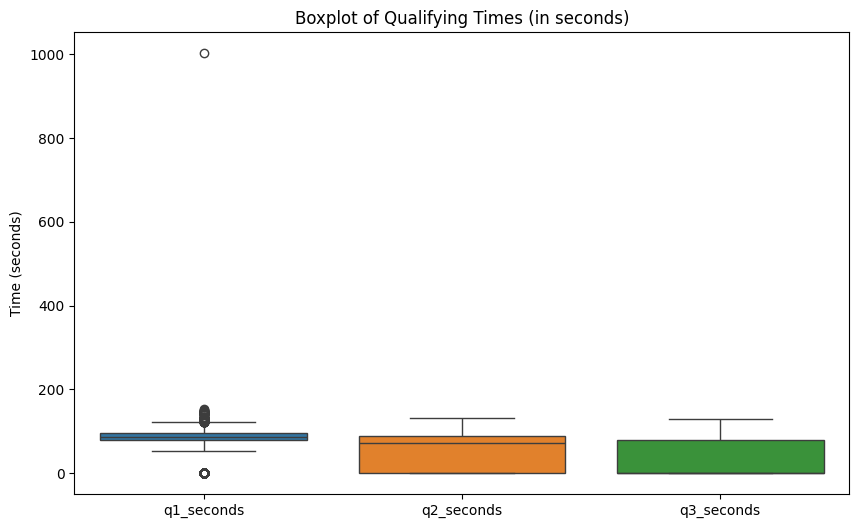

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot for q1_seconds, q2_seconds, and q3_seconds
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['q1_seconds', 'q2_seconds', 'q3_seconds']])
plt.title('Boxplot of Qualifying Times (in seconds)')
plt.ylabel('Time (seconds)')
plt.show()

In [ ]:
# Calculate the mean and threshold for each qualifying round
mean_q1 = df['q1_seconds'].mean()
std_q1 = df['q1_seconds'].std()
threshold_q1 = 1.5 * std_q1  # Example threshold, adjust as needed

mean_q2 = df['q2_seconds'].mean()
std_q2 = df['q2_seconds'].std()
threshold_q2 = 1.5 * std_q2

mean_q3 = df['q3_seconds'].mean()
std_q3 = df['q3_seconds'].std()
threshold_q3 = 1.5 * std_q3


# Function to replace '0:00.0' values with mean + threshold
def replace_zero_times(column, mean, threshold):
    column = column.mask(column == 0, mean + threshold) # Use mask to modify only the matching values
    return column

# Apply the replacement function to each qualifying round
df['q1_seconds'] = replace_zero_times(df['q1_seconds'], mean_q1, threshold_q1)
df['q2_seconds'] = replace_zero_times(df['q2_seconds'], mean_q2, threshold_q2)
df['q3_seconds'] = replace_zero_times(df['q3_seconds'], mean_q3, threshold_q3)

#Verify the changes
print(df[['q1_seconds', 'q2_seconds', 'q3_seconds']].describe())

         q1_seconds    q2_seconds    q3_seconds
count  10254.000000  10254.000000  10254.000000
mean      88.934080    100.120473     91.163263
std       15.692959     16.418267      7.673595
min       53.904000     53.647000     53.377000
25%       78.885250     85.675000     93.117334
50%       87.376000    104.122000     93.117334
75%       96.417000    115.379406     93.117334
max     1002.640000    132.470000    129.776000


In [ ]:
df.tail(5)

,constructorId,name,nationality_x,qualifyId,driverId,position,q1,q2,q3,driverRef,code,forename,surname,dob,nationality_y,q1_seconds,q2_seconds,q3_seconds
10249,215,RB F1 Team,Italian,10269,817,18,1:13.075,0:00.0,0:00.0,ricciardo,RIC,Daniel,Ricciardo,1989-07-01,Australian,73.075,115.379406,93.117334
10250,215,RB F1 Team,Italian,10282,817,11,1:05.569,1:05.289,0:00.0,ricciardo,RIC,Daniel,Ricciardo,1989-07-01,Australian,65.569,65.289000,93.117334
10251,215,RB F1 Team,Italian,10285,852,14,1:05.563,1:05.412,0:00.0,tsunoda,TSU,Yuki,Tsunoda,2000-05-11,Japanese,65.563,65.412000,93.117334
10252,215,RB F1 Team,Italian,10304,852,13,1:30.994,1:27.269,0:00.0,tsunoda,TSU,Yuki,Tsunoda,2000-05-11,Japanese,90.994,87.269000,93.117334
10253,215,RB F1 Team,Italian,10306,817,15,1:31.291,1:27.949,0:00.0,ricciardo,RIC,Daniel,Ricciardo,1989-07-01,Australian,91.291,87.949000,93.117334


No more Min of 0:00.0 As you can see in the seconds no more zero seconds

But found one with 1002 seconds... so 15min doesnt make since so lets work on this

In [ ]:
# Calculate Q1 outliers
Q1_q1 = df['q1_seconds'].quantile(0.25)
Q3_q1 = df['q1_seconds'].quantile(0.75)
IQR_q1 = Q3_q1 - Q1_q1
lower_bound_q1 = Q1_q1 - 1.5 * IQR_q1
upper_bound_q1 = Q3_q1 + 1.5 * IQR_q1

outliers_q1 = df[(df['q1_seconds'] < lower_bound_q1) | (df['q1_seconds'] > upper_bound_q1)]

print("Outliers in q1_seconds:")
print(outliers_q1[['q1_seconds']])

Outliers in q1_seconds:
      q1_seconds
235     1002.640
256      142.441
257      144.117
438      123.008
554      131.081
...          ...
9787     123.166
9900     127.467
9901     127.614
9934     125.579
9935     129.070

[124 rows x 1 columns]


In [ ]:
# Calculate Q1 outliers
Q1_q1 = df['q1_seconds'].quantile(0.25)
Q3_q1 = df['q1_seconds'].quantile(0.75)
IQR_q1 = Q3_q1 - Q1_q1
lower_bound_q1 = Q1_q1 - 1.5 * IQR_q1
upper_bound_q1 = Q3_q1 + 1.5 * IQR_q1

# Replace outliers with the median
median_q1 = df['q1_seconds'].median()
df['q1_seconds'] = np.where((df['q1_seconds'] < lower_bound_q1) | (df['q1_seconds'] > upper_bound_q1), median_q1, df['q1_seconds'])

# Verify the changes (optional)
print(df['q1_seconds'].describe())

count    10254.000000
mean        88.321329
std         11.934962
min         53.904000
25%         78.885250
50%         87.375000
75%         95.951750
max        122.702000
Name: q1_seconds, dtype: float64


In [ ]:
print(df['q3_seconds'].describe())

count    10254.000000
mean        91.163263
std          7.673595
min         53.377000
25%         93.117334
50%         93.117334
75%         93.117334
max        129.776000
Name: q3_seconds, dtype: float64


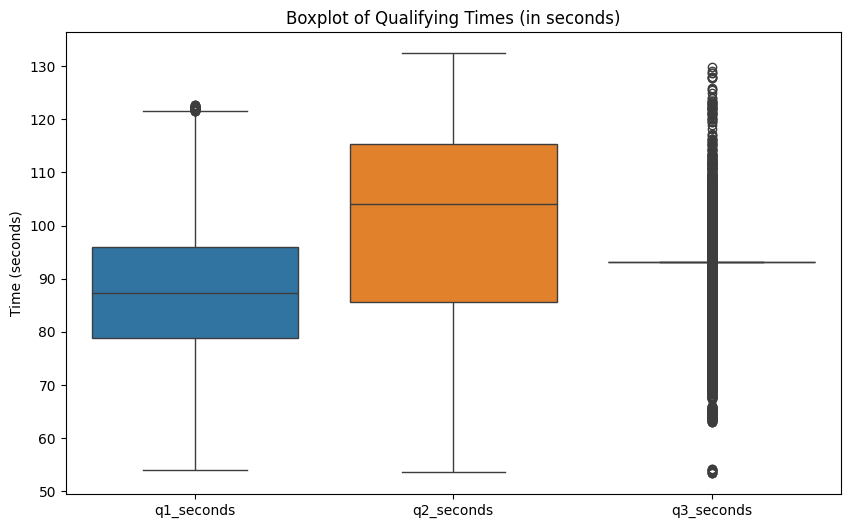

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot for q1_seconds, q2_seconds, and q3_seconds
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['q1_seconds', 'q2_seconds', 'q3_seconds']])
plt.title('Boxplot of Qualifying Times (in seconds)')
plt.ylabel('Time (seconds)')
plt.show()

TO discover: why the box plot counted all q3 as outlier

> Add blockquote



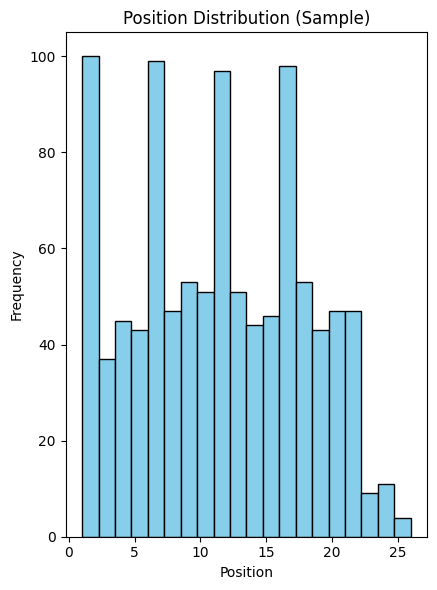

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load a sample of the data
df_sample = df.sample(frac=0.1)  # Sample 10% of the data since it will take longer if we load it all

# Create histograms for the sampled data
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(df_sample['position'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Position Distribution (Sample)')

plt.tight_layout()
plt.show()

            position  q1_seconds  q2_seconds  q3_seconds
position    1.000000    0.129301    0.462592    0.250146
q1_seconds  0.129301    1.000000    0.410002    0.520364
q2_seconds  0.462592    0.410002    1.000000    0.592562
q3_seconds  0.250146    0.520364    0.592562    1.000000


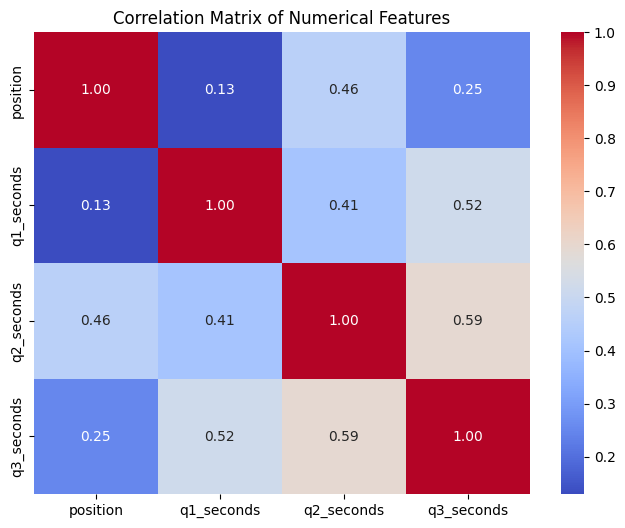

In [ ]:
# Select numerical columns for correlation analysis
numerical_cols = ['position', 'q1_seconds', 'q2_seconds', 'q3_seconds']
corr_matrix = df[numerical_cols].corr()

# Display the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

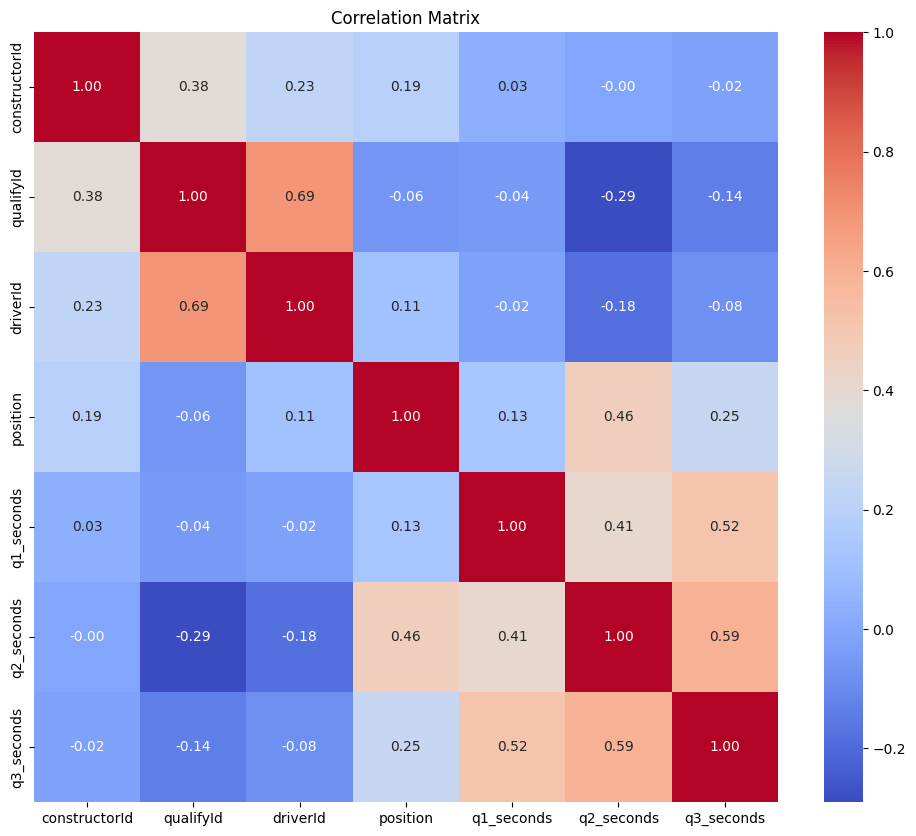

In [ ]:
# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['number']).columns  # Select only numerical columns
correlation_matrix = df[numerical_cols].corr()

# Plot the correlation matrix using seaborn's heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

There Positive corilation with position and Q1 and Q2 and Q3

After removing some of the outliers in the data the data does look somewhat skewed from the original

## For building the model

### Were we are going with Calssification module

In [ ]:
df.head(1)

,constructorId,name,nationality_x,qualifyId,driverId,position,q1,q2,q3,driverRef,code,forename,surname,dob,nationality_y,q1_seconds,q2_seconds,q3_seconds
0,1,McLaren,British,1,1,1,1:26.572,1:25.187,1:26.714,hamilton,HAM,Lewis,Hamilton,1985-01-07,British,86.572,85.187,86.714


In [ ]:
# Split the data into features (X) and target (y)''
# To be removed: Name(after constructor), nationality, driver ref, Forename, DOB, nationality
# Fill na with 0:00:00
# X: rest
# y: posotion
# Model: Logistic Regression
X = df.drop(['name','nationality_x','driverRef','forename','dob','constructorId','qualifyId','driverId','code','surname','nationality_y','position','q1','q2','q3'], axis=1) # Features
y = df['position']              # Target

X

,q1_seconds,q2_seconds,q3_seconds
0,86.572,85.187000,86.714000
1,85.664,85.452000,87.079000
2,95.227,94.759000,96.613000
3,95.392,94.627000,96.709000
4,92.750,91.922000,93.292000
...,...,...,...
10249,73.075,115.379406,93.117334
10250,65.569,65.289000,93.117334
10251,65.563,65.412000,93.117334
10252,90.994,87.269000,93.117334


In [ ]:
# Split the data into features (X) and target (y)''
# To be removed: Name(after constructor), nationality, driver ref, Forename, DOB, nationality
# Fill na with 0:00:00
# X: rest
# y: posotion
# Model: Logistic Regression
X = df.drop(['name','nationality_x','driverRef','forename','dob','nationality_y','position','q1','q2','q3'], axis=1) # Features
y = df['position']              # Target

X

,constructorId,qualifyId,driverId,code,surname,q1_seconds,q2_seconds,q3_seconds
0,1,1,1,HAM,Hamilton,86.572,85.187000,86.714000
1,1,3,5,KOV,Kovalainen,85.664,85.452000,87.079000
2,1,25,5,KOV,Kovalainen,95.227,94.759000,96.613000
3,1,26,1,HAM,Hamilton,95.392,94.627000,96.709000
4,1,47,1,HAM,Hamilton,92.750,91.922000,93.292000
...,...,...,...,...,...,...,...,...
10249,215,10269,817,RIC,Ricciardo,73.075,115.379406,93.117334
10250,215,10282,817,RIC,Ricciardo,65.569,65.289000,93.117334
10251,215,10285,852,TSU,Tsunoda,65.563,65.412000,93.117334
10252,215,10304,852,TSU,Tsunoda,90.994,87.269000,93.117334


In [ ]:
y

,position
0,1
1,3
2,3
3,4
4,3
...,...
10249,18
10250,11
10251,14
10252,13


In [ ]:
print(X.shape, y.shape)

(10254, 8) (10254,)


Applying encoder

were are going with classification

train.describe()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier # thought about using it
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

## fixed now we need to apply model


In [ ]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

print(X.head())

   constructorId  qualifyId  driverId  code  surname  q1_seconds  q2_seconds  \
0              1          1         1    32       53      86.572      85.187   
1              1          3         5    40       70      85.664      85.452   
2              1         25         5    40       70      95.227      94.759   
3              1         26         1    32       53      95.392      94.627   
4              1         47         1    32       53      92.750      91.922   

   q3_seconds  
0      86.714  
1      87.079  
2      96.613  
3      96.709  
4      93.292  


In [ ]:
from sklearn.model_selection import train_test_split
# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X

,constructorId,qualifyId,driverId,code,surname,q1_seconds,q2_seconds,q3_seconds
0,1,1,1,32,53,86.572,85.187000,86.714000
1,1,3,5,40,70,85.664,85.452000,87.079000
2,1,25,5,40,70,95.227,94.759000,96.613000
3,1,26,1,32,53,95.392,94.627000,96.709000
4,1,47,1,32,53,92.750,91.922000,93.292000
...,...,...,...,...,...,...,...,...
10249,215,10269,817,67,115,73.075,115.379406,93.117334
10250,215,10282,817,67,115,65.569,65.289000,93.117334
10251,215,10285,852,83,138,65.563,65.412000,93.117334
10252,215,10304,852,83,138,90.994,87.269000,93.117334


Scaleing the X

In [ ]:
# Define weights for qualifying times (e.g., emphasize their importance)
feature_weights = {
    'q1_seconds': 3.0,  # Weight for Q1
    'q2_seconds': 3.0,  # Weight for Q2
    'q3_seconds': 3.0   # Weight for Q3
}

In [ ]:
# Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Convert scaled arrays back to DataFrames for easier manipulation
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
# Apply feature weights to the qualifying times
for feature, weight in feature_weights.items():
    X_train_scaled[feature] *= weight
    X_test_scaled[feature] *= weight

print("Weighted Scaled Training Data:")
print(X_train_scaled.head())

Weighted Scaled Training Data:
   constructorId  qualifyId  driverId      code   surname  q1_seconds  \
0      -0.582127   0.340915  1.249137  1.056246  1.258286    4.765893   
1      -0.458557  -1.351669 -0.793924 -1.772030 -1.791521   -3.797227   
2      -0.568397  -1.688039 -0.842999  0.390769  0.797524   -2.756979   
3       2.273719   1.511000  1.347287 -1.239649  1.653225    0.477211   
4      -0.444827  -0.386826 -0.858496 -0.673993 -0.606704   -1.177741   

   q2_seconds  q3_seconds  
0    1.224497    0.754092  
1    2.755248    0.754092  
2   -4.180308   -4.929103  
3    2.755248    0.754092  
4    2.755248    0.754092  


# Now applying models

## ML MODELS (Machine Learning)

Logistic Regression ( Mohamed Ismail )

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Initialize and fit logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.10562235944101397
Classification Report:
               precision    recall  f1-score   support

           1       0.14      0.29      0.19       138
           2       0.00      0.00      0.00       155
           3       0.09      0.13      0.10       142
           4       0.08      0.09      0.08       135
           5       0.12      0.06      0.08       146
           6       0.05      0.02      0.03       137
           7       0.14      0.06      0.09       155
           8       0.06      0.03      0.04       152
           9       0.06      0.01      0.01       152
          10       0.06      0.01      0.01       150
          11       0.12      0.05      0.07       153
          12       0.16      0.24      0.19       139
          13       0.04      0.07      0.05       141
          14       0.08      0.03      0.04       148
          15       0.06      0.10      0.08       149
          16       0.06      0.10      0.07       135
          17       0.07    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost (eXtreme Gradient Boosting)     ## Foad

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize XGBoost regressor
xgb_model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

Evaluating using                   ## Mouhab

Mean Absolute Error (MAE):

Root Mean Squared Error (RMSE):

R² Score:


In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
print(f"Random Forest - Accuracy (R² Score): {r2 * 100:.2f}%")

Mean Absolute Error (MAE): 1.7739942073822021
Root Mean Squared Error (RMSE): 2.3345060013011496
R² Score: 0.8593211770057678
Random Forest - Accuracy (R² Score): 85.93%


1.77 positions away from the actual position.

2.33 shows the standard deviation of prediction errors

86% of the variance in the target variable

The model has learned meaningful patterns from the data and is making accurate predictions most of the time.
However, the RMSE being slightly higher than MAE suggests the model may occasionally make larger prediction errors.
So we need to imporve it

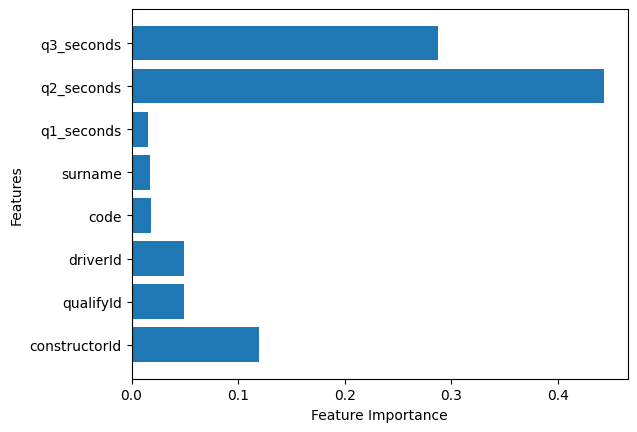

In [ ]:
# Check which features are most influential in the model.
feature_importances = xgb_model.feature_importances_
plt.barh(X_train.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

# Random Forest ##Youssef

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 19.63%


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Instantiate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print(f"Random Forest Accuracy: {rf_r2 * 100:.2f}%")

Random Forest Mean Absolute Error (MAE): 1.7526649333766655
Random Forest Root Mean Squared Error (RMSE): 2.318780476657402
Random Forest R² Score: 0.8612100477644168
Random Forest Accuracy (R² Score): 86.12%


-------------------------------------------------------------
________________________________________________________
---------------------------------------------------------------------------------

## DL MODELS (Deep Learning)

Simple Neural Network  ## Mouhab


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.backend import clear_session

# Clear the session to remove everything
clear_session()

# Initialize the neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError

# Compile the model
optimizer = Adam(learning_rate=0.01)

model.compile(optimizer=optimizer, loss='mean_squared_error')


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=80, callbacks=[early_stopping])


Epoch 1/80
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 40.6325 - val_loss: 21.4806
Epoch 2/80
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.3148 - val_loss: 18.6895
Epoch 3/80
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.9306 - val_loss: 19.7798
Epoch 4/80
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18.4402 - val_loss: 16.5175
Epoch 5/80
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.6480 - val_loss: 16.0115
Epoch 6/80
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.5948 - val_loss: 15.5253
Epoch 7/80
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.8926 - val_loss: 16.3875
Epoch 8/80
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.6993 - val_loss: 14.2553
Epoch 9/80
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.9051 - val_loss: 15.1343
Epoch 10/80
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.1374 - val_loss: 14.6918
Epoch 11/80
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.4671 - val_loss: 15.3739
Epoch 12/80
202/202 ━━━━━━━━━━

In [ ]:
# Make predictions
y_pred_nn = model.predict(X_test_scaled).flatten()

# Evaluate the model
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print(f"Neural Network - Mean Absolute Error (MAE): {mae_nn}")
print(f"Neural Network - Root Mean Squared Error (RMSE): {rmse_nn}")
print(f"Neural Network - R² Score: {r2_nn}")
print(f"Random Forest - Accuracy (R² Score): {r2_nn * 100:.2f}%")

Neural Network - Mean Absolute Error (MAE): 2.6102702617645264
Neural Network - Root Mean Squared Error (RMSE): 3.3716370110583345
Neural Network - R² Score: 0.7065593004226685
Random Forest - Accuracy (R² Score): 70.66%


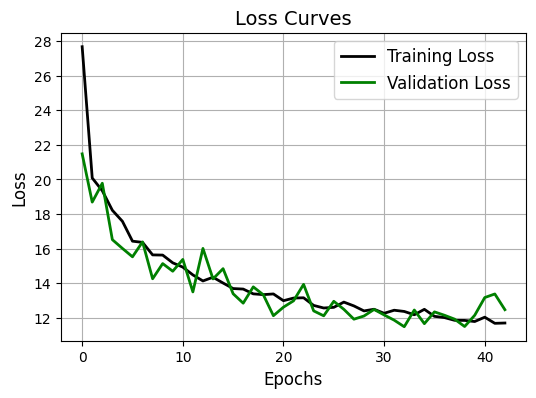

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0, label='Training Loss')
plt.plot(history.history['val_loss'], 'green', linewidth=2.0, label='Validation Loss')
plt.legend(fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Loss Curves', fontsize=14)
plt.grid(True)  # Add gridlines for better visualization
plt.show()

## Ensemble

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier # data isnt a classifier its a regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor

In [ ]:
model1 = LinearRegression()
#model2 = MLPRegressor(hidden_layer_sizes=(50, 10), max_iter=10, random_state=42) # Neural Network
model3 = GradientBoostingRegressor(random_state=42)
model4 = DecisionTreeRegressor(max_depth=4)

In [ ]:
estimators = [('lr', model1), ('gb', model3), ('rf', model4)] # ('nn', model2),

In [ ]:
for estimator in estimators:
    scores = cross_val_score(estimator[1], X, y, scoring='r2')
    print(estimator[0], np.round(np.mean(scores), 2))

lr -0.24
gb 0.58
rf 0.33


In [ ]:
vr = VotingRegressor(estimators)
scores = cross_val_score(vr, X, y, scoring='r2')
print('Voting Regressor', np.round(np.mean(scores), 2))

Voting Regressor 0.38


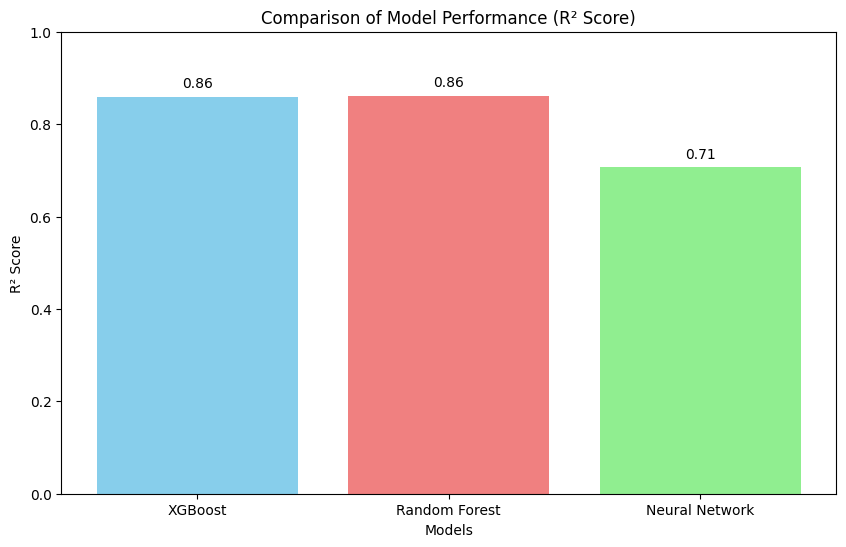

In [ ]:
# Assuming you have the R2 scores for each model stored in a dictionary
model_r2_scores = {
    'XGBoost': r2,  # Replace with your actual XGBoost R2 score
    'Random Forest': rf_r2,  # Replace with your actual Random Forest R2 score
    'Neural Network': r2_nn  # Replace with your actual Neural Network R2 score
}


models = list(model_r2_scores.keys())
r2_scores = list(model_r2_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Comparison of Model Performance (R² Score)")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for R² score
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center') # Added text labels
plt.show()